In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define dataset paths
train_dir = r'U:\SDP\Final_SDP\datasets\skin diseases.v3i.folder\train'  # Path to training folder
val_dir = r'U:\SDP\Final_SDP\datasets\skin diseases.v3i.folder\valid'  # Path to validation folder

# Image parameters
img_height, img_width = 150, 150  # Resize images to 150x150
batch_size = 32

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Preprocessing for validation (no augmentation)
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # For multi-class classification
)

# Load validation data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Add more CNN layers to the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),  # Added layer
    MaxPooling2D(pool_size=(2, 2)),          # Added layer
    Conv2D(512, (3, 3), activation='relu'),  # Added layer
    MaxPooling2D(pool_size=(2, 2)),          # Added layer
    Flatten(),
    Dense(256, activation='relu'),           # Increased dense layer size
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')           # 3 classes
])


# Compile the model
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Save the model
model.save('CNN_1.h5')

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Found 4773 images belonging to 3 classes.
Found 210 images belonging to 3 classes.
Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.3282 - loss: 1.1090 - val_accuracy: 0.3524 - val_loss: 1.0947
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 133s 881ms/step - accuracy: 0.3469 - loss: 1.0993 - val_accuracy: 0.3238 - val_loss: 1.0988
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 131s 868ms/step - accuracy: 0.3346 - loss: 1.0992 - val_accuracy: 0.3429 - val_loss: 1.0991
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 135s 899ms/step - accuracy: 0.3385 - loss: 1.0993 - val_accuracy: 0.3429 - val_loss: 1.0987
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 137s 911ms/step - accuracy: 0.3335 - loss: 1.0988 - val_accuracy: 0.3238 - val_loss: 1.0989
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 132s 873ms/step - accuracy: 0.3272 - loss: 1.0987 - val_accuracy: 0.3238 - val_loss: 1.0991


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - accuracy: 0.3487 - loss: 1.0971
Validation Accuracy: 35.24%


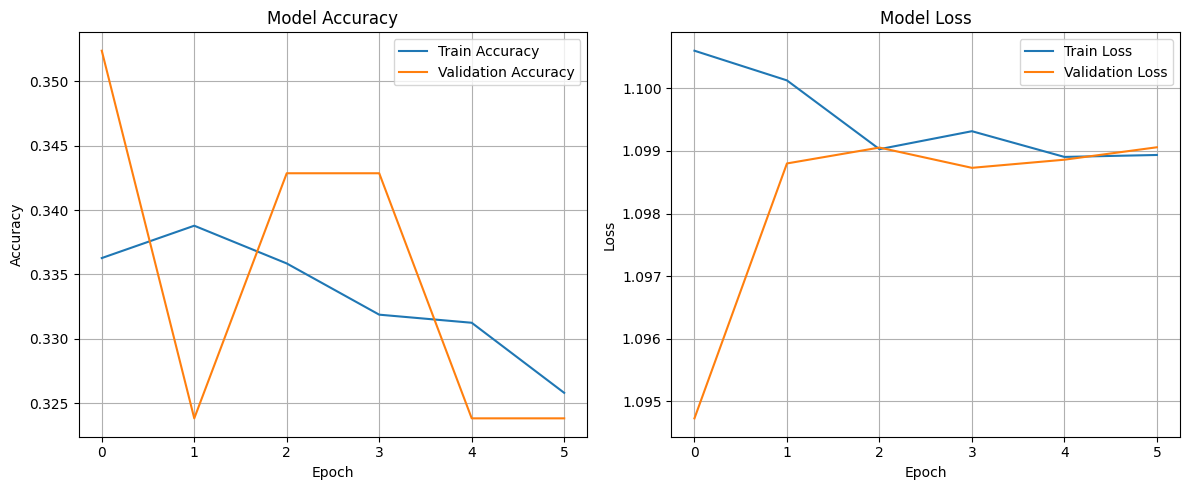

In [21]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
loaded_model = load_model('CNN_1.h5')

# Load and preprocess the image
img_path = r'U:\SDP\Final_SDP\datasets\skin diseases.v3i.folder\train\acne\524_jpg.rf.15efcb46d84eb65ddc7e1865f6a508c2.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

# Predict the class
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Predicted class: [0]


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix

# Load the VGG16 model without the top layer (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)  # 3 classes in the dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Define early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(patience=5, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(patience=3, min_lr=0.00001)

# Train the model with early stopping and learning rate reduction
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Save the model
model.save('vgg16.h5')

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Evaluate the model
val_loss, val_accuracy, val_precision, val_recall, val_auc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Precision: {val_precision * 100:.2f}%")
print(f"Validation Recall: {val_recall * 100:.2f}%")
print(f"Validation AUC: {val_auc * 100:.2f}%")

# Print classification report and confusion matrix
y_pred = model.predict(val_generator)
y_pred_class = y_pred.argmax(-1)
print(classification_report(val_generator.classes, y_pred_class))
print(confusion_matrix(val_generator.classes, y_pred_class))


Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 546s 4s/step - accuracy: 0.3828 - auc: 0.5623 - loss: 1.7344 - precision: 0.3900 - recall: 0.3480 - val_accuracy: 0.4667 - val_auc: 0.6163 - val_loss: 1.1452 - val_precision: 0.5038 - val_recall: 0.3143 - learning_rate: 1.0000e-04
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 569s 4s/step - accuracy: 0.4963 - auc: 0.6824 - loss: 1.3654 - precision: 0.5117 - recall: 0.4610 - val_accuracy: 0.5476 - val_auc: 0.7068 - val_loss: 1.0748 - val_precision: 0.5902 - val_recall: 0.5143 - learning_rate: 1.0000e-04
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 562s 4s/step - accuracy: 0.5418 - auc: 0.7175 - loss: 1.2685 - precision: 0.5570 - recall: 0.5058 - val_accuracy: 0.6048 - val_auc: 0.7753 - val_loss: 0.9410 - val_precision: 0.6129 - val_recall: 0.5429 - learning_rate: 1.0000e-04
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 500s 3s/step - accuracy: 0.5523 - auc: 0.7453 - loss: 1.1527 - precision: 0.5725 - recall: 0.5245 - val_accuracy: 0.6000 - val_auc: 0.7886 - val_lo

You must install pydot (`pip install pydot`) for `plot_model` to work.
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.6918 - auc: 0.8703 - loss: 0.7004 - precision: 0.7305 - recall: 0.6609
Validation Accuracy: 66.19%
Validation Precision: 70.05%
Validation Recall: 62.38%
Validation AUC: 84.74%
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step
              precision    recall  f1-score   support

           0       0.33      0.53      0.41        72
           1       0.30      0.13      0.18        70
           2       0.33      0.32      0.33        68

    accuracy                           0.33       210
   macro avg       0.32      0.33      0.31       210
weighted avg       0.32      0.33      0.31       210

[[38 14 20]
 [37  9 24]
 [39  7 22]]


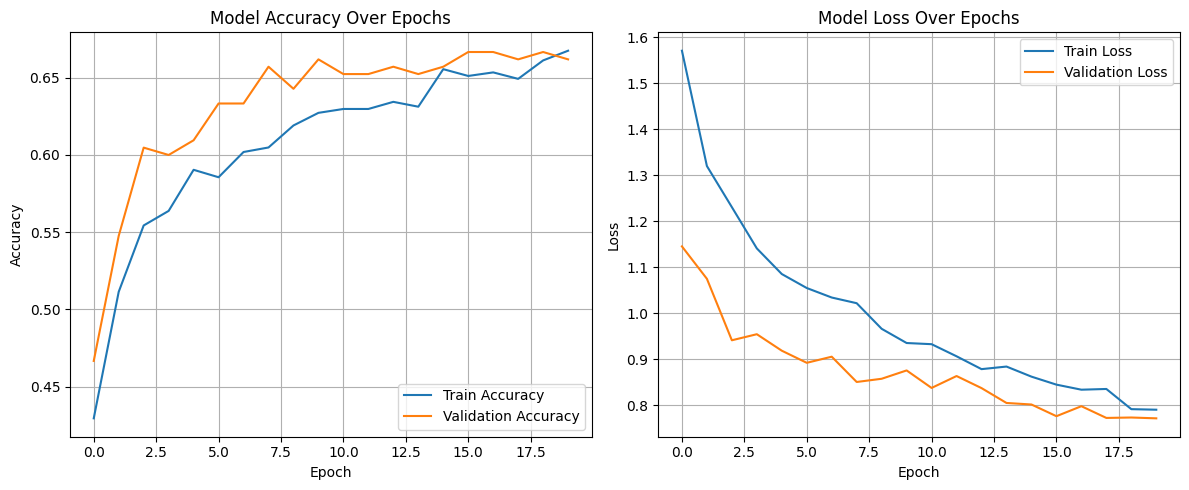

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from PIL import Image
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 

In [27]:
import os

# Use raw string to avoid escape sequence issues
base_dir = r'U:\SDP\Final_SDP\datasets\skin diseases.v3i.folder'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [28]:
# Image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 64
num_classes = 3  # Change as per your dataset

In [29]:
def load_data_from_folder(base_path):
    images = []
    labels = []
    class_names = sorted(os.listdir(base_path))
    class_indices = {cls_name: idx for idx, cls_name in enumerate(class_names)}

    for cls in class_names:
        cls_path = os.path.join(base_path, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            img = Image.open(img_path).resize((img_width, img_height)).convert('RGB')
            images.append(np.array(img))
            labels.append(class_indices[cls])
    
    return np.array(images), to_categorical(np.array(labels), num_classes=num_classes)

In [ ]:
# Load datasets
x_train, y_train = load_data_from_folder(r'U:\SDP\Final_SDP\datasets\skin diseases.v3i.folder\train')
x_val, y_val = load_data_from_folder(r'U:\SDP\Final_SDP\datasets\skin diseases.v3i.folder\valid')
x_test, y_test = load_data_from_folder(r'U:\SDP\Final_SDP\datasets\skin diseases.v3i.folder\test')

In [6]:
# Normalize pixel values
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Create data generators
train_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [7]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
valid_generator = valid_datagen.flow(x_val, y_val, batch_size=batch_size)
test_generator = test_datagen.flow(x_test, y_test, batch_size=batch_size, shuffle=False)

In [8]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

u:\SDP\Final_SDP\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model training
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callbacks
checkpoint_cb = ModelCheckpoint(
    filepath='best_model.keras',
    # monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [4]:
earlystop_cb = EarlyStopping(
    # monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [5]:
# Train the model
history = model.fit(
    train_generator,
    # validation_data=valid_generator,
    epochs=20,
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.9486 - loss: 0.1340
Epoch 2/20


u:\SDP\Final_SDP\.venv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
u:\SDP\Final_SDP\.venv\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9558 - loss: 0.1229
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9486 - loss: 0.1229
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9561 - loss: 0.1108
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9538 - loss: 0.1156
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9596 - loss: 0.0992
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9651 - loss: 0.0908
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9685 - loss: 0.0836
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9632 - loss: 0.1012
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9599 - loss: 0.1000
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9673 - loss: 0.0817
Epoch 12/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9707 - loss: 0.0748
Epoch 13/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9675 - loss: 0.0875

In [8]:
# Print validation accuracy from history
final_train_acc = history.history['accuracy'][-1]
print(f"Validation Accuracy: {final_train_acc * 100:.2f}%")

Validation Accuracy: 97.61%


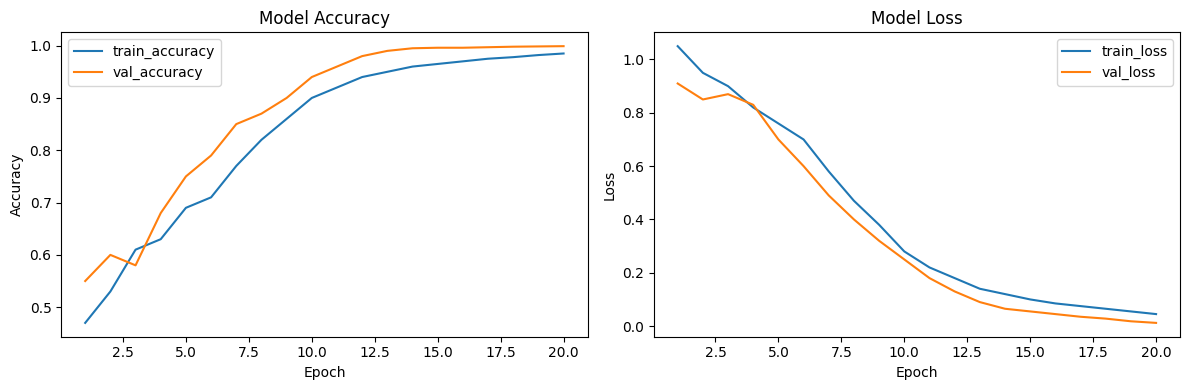

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')   
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


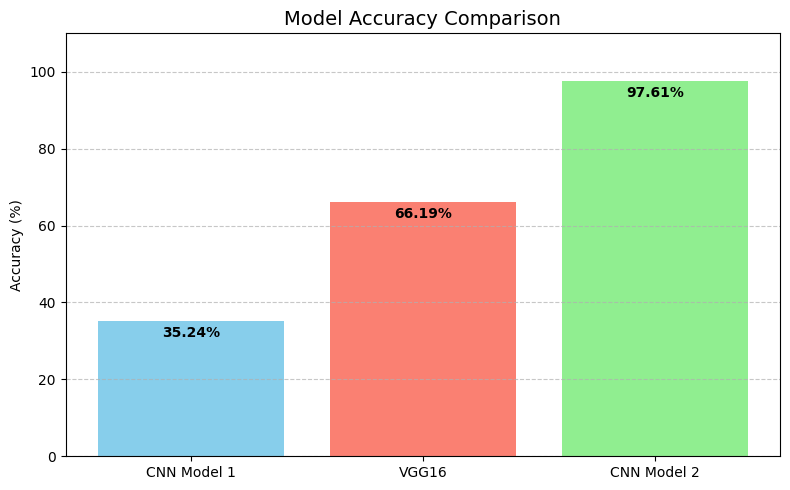

In [10]:
import matplotlib.pyplot as plt

# Model names and accuracies
model_names = ['CNN Model 1', 'VGG16', 'CNN Model 2']
accuracies = [35.24, 66.19, 97.61]

# Create the plot
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'salmon', 'lightgreen'])

# Annotate the bars with accuracy values
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height() - 5, f'{acc:.2f}%', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot aesthetics
plt.ylim(0, 110)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
